# TP03a - Arthur Carlos de Faria - 0040421

Sistemas lineares (SLITs) de tempo discreto.

**HONESTIDADE ACADÊMICA**

Todo o trabalho feito no sentido do cumprimento das expectativas deste curso deve ser exclusivamente seu. A colaboração de terceiros na realização dos trabalhos não é permitida.

Ver ou copiar o trabalho de outro indivíduo do curso ou retirar material de um livro, site ou outra fonte, mesmo em parte e apresentá-lo como seu próprio constitui desonestidade acadêmica, assim como mostrar ou dar a sua obra, mesmo em parte, a outro estudante. Da mesma forma, é desonestidade acadêmica fornecer ou tornar as soluções disponíveis dos trabalhos para os indivíduos que fazem ou poderão fazer este curso no futuro. Você está convidado a discutir o material do curso com os outros, a fim de melhor compreendê-lo. Você pode até discutir sobre os trabalhos com os colegas, mas você não pode compartilhar códigos, funções, projetos, tabelas, desenhos esquemáticos, mapas ou diagramas.

Você pode e deve recorrer à Web para obter referências na busca de soluções para os trabalhos, mas não por soluções definitivas para os problemas. No entanto, deve-se citar explicitamente no projeto a origem de qualquer procedimento ou técnica que você descubra fora do curso.

Todas as formas de desonestidade acadêmica são tratadas com rigor.


**Instruções:**
- Use a versão Python 3.x
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.
- Não inclua mais células do que o especificado e mantenha a organização.
- Use `plt.figure(figsize=(10,2))` para ajustar o tamanho das figuras e sempre coloque rótulos.

**Objetivos**
- Implementar diferentes sistemas discretos
- Analisar os sistemas implementados

## Dados epidemiológicos

O código abaixo carrega os dados atualizados da covid-19 no Brasil (Fonte: https://github.com/datasets/covid-19).

In [1]:
# Importa dados
import pandas as pd, numpy as np
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
dados = pd.read_csv(URL_DATASET)

# datas
datas = dados[dados['Country'] == 'Brazil']['Date']

# número de casos recuperados
brRec = dados[dados['Country'] == 'Brazil']['Recovered'].to_numpy(dtype=np.float64)

# número de casos confirmados
brCas = dados[dados['Country'] == 'Brazil']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
brMor = dados[dados['Country'] == 'Brazil']['Deaths'].to_numpy(dtype=np.float64)

dados[dados['Country'] == 'Brazil'].head(-1)

,Date,Country,Confirmed,Recovered,Deaths
6394,2020-01-22,Brazil,0,0,0
6395,2020-01-23,Brazil,0,0,0
6396,2020-01-24,Brazil,0,0,0
6397,2020-01-25,Brazil,0,0,0
6398,2020-01-26,Brazil,0,0,0
...,...,...,...,...,...
6666,2020-10-20,Brazil,5273954,4526393,154837
6667,2020-10-21,Brazil,5298772,4526393,155403
6668,2020-10-22,Brazil,5323630,4526393,155900
6669,2020-10-23,Brazil,5353656,4526393,156471


Existem três variáveis do código acima que você utilizará:
- `brRec`: número de casos recuperados
- `brCas`: número de casos confirmados
- `brMor`: número de mortes

<mark>**Fazer:** importe as bibliotecas e plote os gráficos das três variáveis acima.</mark>

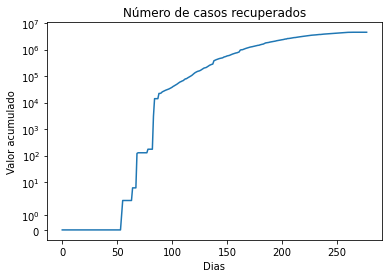

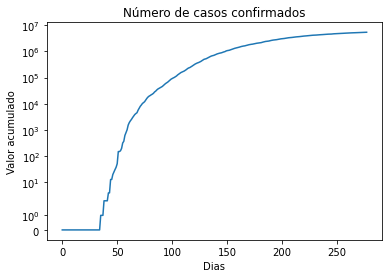

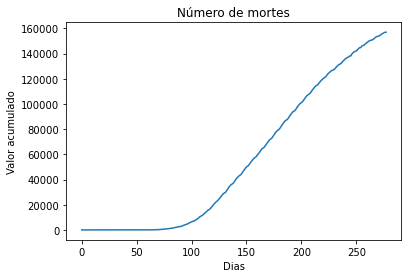

In [2]:
### SEU CÓDIGO COMEÇA AQUI ###
import matplotlib.pyplot as plt, numpy as np, scipy as sp
from scipy.fft import fft
plt.title("Número de casos recuperados")
plt.yscale('symlog')
plt.ylabel("Valor acumulado")
plt.xlabel("Dias")
plt.plot(brRec)
plt.show()

plt.title("Número de casos confirmados")
plt.ylabel("Valor acumulado")
plt.xlabel("Dias")
plt.yscale('symlog')
plt.plot(brCas)
plt.show()

plt.title("Número de mortes")
plt.ylabel("Valor acumulado")
plt.xlabel("Dias")
plt.plot(brMor)
plt.show()

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do número de casos recuperados diários
1. Gráfico do número de casos confirmados diários
1. Gráfico do número de mortes diárias
---

## Análise na frequência

Agora faça análise desses sinais no domínio da frequência.

<mark>**Fazer:** faça a FFT (somente módulo) dos sinais acima. Sabendo que o período de amostragem é de um dia, represente o eixo horizontal da FFT em uma unidade que seja possível de relacionar facilmente com o período de dias correspondente.</mark>

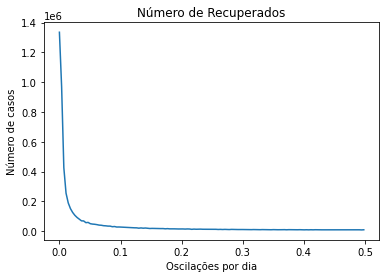

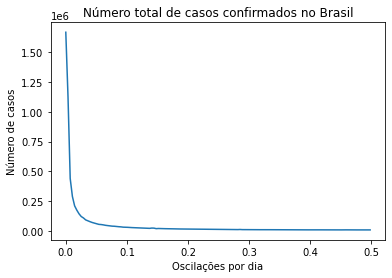

<function matplotlib.pyplot.show(*args, **kw)>

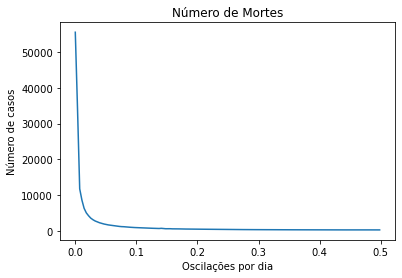

In [3]:
### SEU CÓDIGO COMEÇA AQUI ###
#periodo de amostragem=1
freqMax=1#Maior valor de frequência em oscilações por dia
freqs=np.linspace(0,freqMax,len(brRec))
freqs=freqs[:len(freqs)//2]

fftbrRec=fft(brRec)/len(brRec)
fftbrCas=fft(brCas)/len(brCas)
fftbrMor=fft(brMor)/len(brMor)

fftbrRec=fftbrRec[:len(fftbrRec)//2]
fftbrCas=fftbrCas[:len(fftbrCas)//2]
fftbrMor=fftbrMor[:len(fftbrMor)//2]

plt.title("Número de Recuperados")
plt.xlabel("Oscilações por dia")
plt.ylabel("Número de casos")
plt.plot( freqs,np.abs(fftbrRec))
plt.show()

plt.title("Número total de casos confirmados no Brasil")
plt.ylabel("Número de casos")
plt.xlabel("Oscilações por dia")
plt.plot( freqs,np.abs(fftbrCas))
plt.show()

plt.title("Número de Mortes")
plt.ylabel("Número de casos")
plt.xlabel("Oscilações por dia")
plt.plot( freqs,np.abs(fftbrMor))
plt.show

### FIM DO CÓDIGO ###

**Saída esperada**:
1. FFT (módulo) do número de casos recuperados
1. FFT (módulo) do número de casos confirmados
1. FFT (módulo) do número de mortes
---

## Sistemas de tempo discreto

Usando as funções da biblioteca de processamento de sinais (https://docs.scipy.org/doc/scipy/reference/signal.html), implemente os seguintes sistemas:
1. Sistema de diferenças regressivas
1. Sistema média móvel causal de 7 amostras (uma semana)
1. Sistema média móvel não causal de 7 amostras (uma semana)

**ATENÇÃO**: as funções usadas para sistemas contínuos são diferentes das usadas para sistemas discretos.

Após implementar os três sistemas acima, para cada um deles faça:
- Plote o diagrama de Bode do sistema (módulo e fase)
- Mostre a resposta ao degrau do sistema
- Mostre a constelação de polos e zeros no plano z (você pode usar a função `control.pzmap` da biblioteca 'Python Control Systems Library' se quiser)

<mark>**Fazer:** mostre os gráficos para cada sistema em uma célula.</mark>

In [4]:
### SEU CÓDIGO COMEÇA AQUI ###
def diferencaRegressiva(vet):
    
    vetorResultado=np.zeros(len(vet),dtype=complex)
    for k in np.arange(0,len(vet)-1,1,dtype=int):
        if(k==0):
            vetorResultado[0]=vet[0]
        else:
            vetorResultado[k]=vet[k]-vet[k-1];
    return vetorResultado   
    
    #HS=1-e**(-s)
### FIM DO CÓDIGO ###

<ipython-input-5-a35200a7b04d>:18: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq,20*np.log10(np.abs(sysDRfft)))


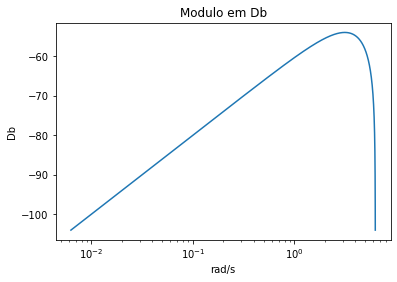

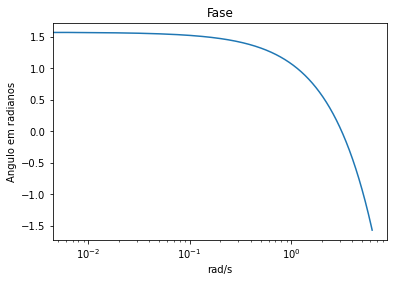

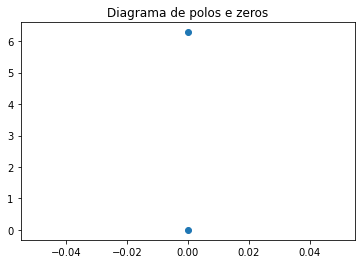

C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


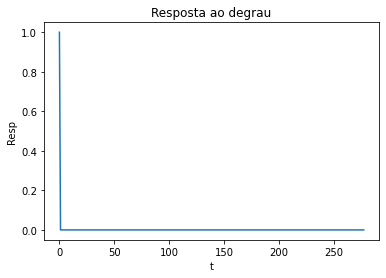

In [5]:
### SEU CÓDIGO COMEÇA AQUI ###

import scipy as sc
from scipy import signal
    
impulso=(np.linspace(0,999,1000)==0)
impulso=np.array(impulso,dtype=float)

sysDR=diferencaRegressiva(impulso)
sysDRfft=fft(sysDR)/len(sysDR)
freq=np.arange(0,2*np.pi, 2*np.pi/(len(sysDRfft)))


plt.title("Modulo em Db")
plt.ylabel("Db")
plt.xlabel("rad/s")
plt.xscale('log')
plt.plot(freq,20*np.log10(np.abs(sysDRfft)))
plt.show()
plt.title("Fase")
plt.ylabel("Angulo em radianos")
plt.xlabel("rad/s")
plt.xscale('log')
plt.plot(freq,np.angle(sysDRfft))
plt.show()

plt.title("Diagrama de polos e zeros")
plt.plot([0,0],[0,2*np.pi],'o')
plt.show()

degrau=np.array((np.zeros(len(brCas))==0),dtype=float)
respostaDegrau=diferencaRegressiva(degrau)
plt.title("Resposta ao degrau")
plt.ylabel("Resp")
plt.xlabel("t")
plt.plot(respostaDegrau)
plt.show()


**Saída esperada**:
1. Diagrama de Bode do **sistema de diferenças regressivas**
1. Resposta ao degrau
1. Constelação de polos e zeros

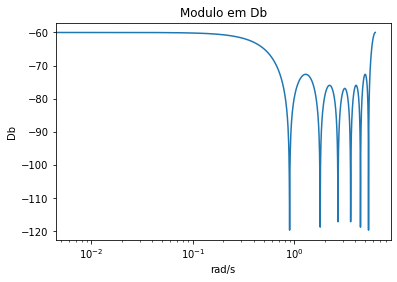

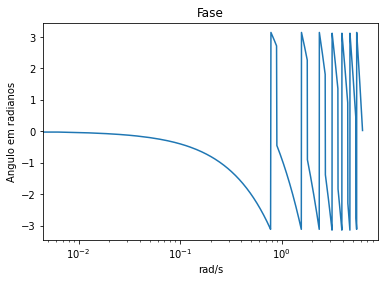

C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


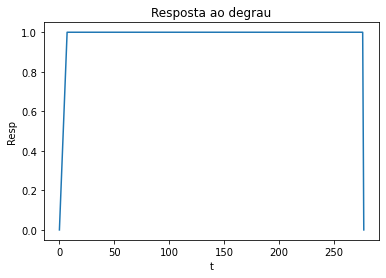

In [34]:
### SEU CÓDIGO COMEÇA AQUI ###
def mediaMovelCausal(vet,N):
    
    vetorResultado=np.zeros(len(vet),dtype=complex)
    soma=0
    for k in np.arange(0,len(vet)-1,1,dtype=int):
        if(k<N):
            for i in np.arange(0,k,1,dtype=int):
                soma+=vet[i]
                vetorResultado[k]=soma/N
            soma=0
        if(k>=N):
            for i in np.arange(k-N,k,1):
                soma+=vet[i]
                vetorResultado[k]=float(soma/N)               
            soma=0
        
            
    return vetorResultado   
sysMC=mediaMovelCausal(impulso,7)
sysMCfft=fft(sysMC)/len(sysMC)
freq=np.arange(0,2*np.pi, 2*np.pi/(len(sysDRfft)))


plt.title("Modulo em Db")
plt.ylabel("Db")
plt.xlabel("rad/s")
plt.xscale('log')
plt.plot(freq,20*np.log10(np.abs(sysMCfft)))
plt.show()
plt.title("Fase")
plt.ylabel("Angulo em radianos")
plt.xlabel("rad/s")
plt.xscale('log')
plt.plot(freq,np.angle(sysMCfft))
plt.show()



degrau=np.array((np.zeros(len(brCas))==0),dtype=float)
respostaDegrau=mediaMovelCausal(degrau,7)
plt.title("Resposta ao degrau")
plt.ylabel("Resp")
plt.xlabel("t")
plt.plot(respostaDegrau)
plt.show()

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Diagrama de Bode do **sistema média móvel causal**
1. Resposta ao degrau
1. Constelação de polos e zeros

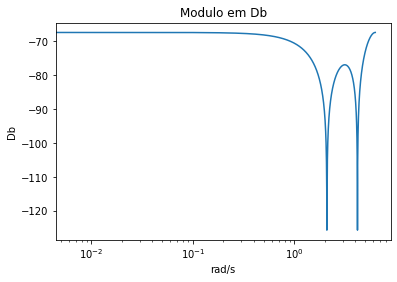

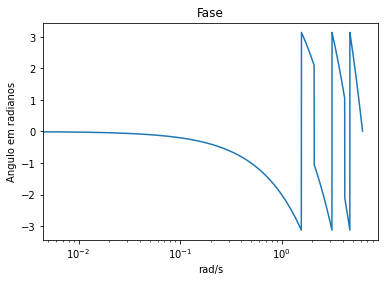

C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


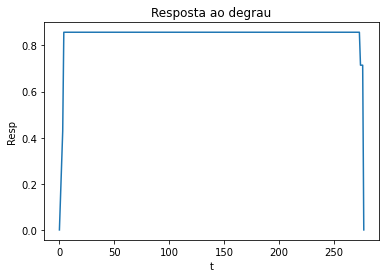

In [7]:
### SEU CÓDIGO COMEÇA AQUI ###
def mediaMovelNaoCausal(vet,N):
    
    vetorResultado=np.zeros(len(vet),dtype=complex)
    soma=0
    for k in np.arange(0,len(vet)-1,1,dtype=int):
        if(k<(N/2)):
            for i in np.arange(0,k,1,dtype=int):
                soma+=vet[i]
                vetorResultado[k]=soma/N
            soma=0
           
        if(k>=(len(vet)-N/2-1)):
            for i in np.arange((len(vet)-N/2-1),len(vet),1,dtype=int):
                soma+=vet[i]
                vetorResultado[k]=soma/N
            soma=0
                
                
        if((k>=(N/2))and(k<(len(vet)-N/2-1))):
            for i in np.arange(k-3,k+3,1):
                soma+=vet[i]
                vetorResultado[k]=float(soma/N)               
            soma=0
        
            
    return vetorResultado   
sysMNC=mediaMovelNaoCausal(impulso,7)
sysMNCfft=fft(sysMNC)/len(sysMNC)
freq=np.arange(0,2*np.pi, 2*np.pi/(len(sysDRfft)))


plt.title("Modulo em Db")
plt.ylabel("Db")
plt.xlabel("rad/s")
plt.xscale('log')
plt.plot(freq,20*np.log10(np.abs(sysMNCfft)))
plt.show()
plt.title("Fase")
plt.ylabel("Angulo em radianos")
plt.xlabel("rad/s")
plt.xscale('log')
plt.plot(freq,np.angle(sysMNCfft))
plt.show()



degrau=np.array((np.zeros(len(brCas))==0),dtype=float)
respostaDegrau=mediaMovelNaoCausal(degrau,7)
plt.title("Resposta ao degrau")
plt.ylabel("Resp")
plt.xlabel("t")
plt.plot(respostaDegrau)
plt.show()

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Diagrama de Bode do **sistema média móvel não causal**
1. Resposta ao degrau
1. Constelação de polos e zeros
---

## Passando os dados pelos sistemas

Abaixo, passe um dos dados da covid (escolha APENAS um dos três dados) pelos três sistemas implementados. Faça os seguinte gráficos.
1. Compare o sinal, no domínio do tempo, antes e após passar pelo sistema
1. Compare o módulo da FFT do sinal, no domínio do frequência, antes e após passar pelo sistema

_______________________________
|           LEGENDA            |
|Azul-Número de casos          |
|Amarelo-Diferenças regressivas|
|______________________________|


C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


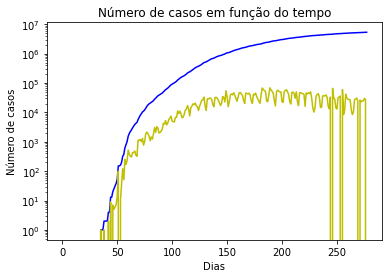

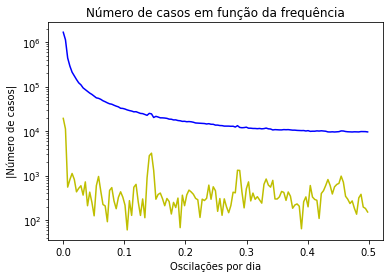

In [8]:
### SEU CÓDIGO COMEÇA AQUI ###
brCasDR=diferencaRegressiva(brCas)

brCasDRFFT=fft(brCasDR)/len(brCasDR)
print("_______________________________")
print("|           LEGENDA            |")
print("|Azul-Número de casos          |")
print("|Amarelo-Diferenças regressivas|")
print("|______________________________|")
brCasDRFFT=brCasDRFFT[:len(brCasDRFFT)//2]
plt.title("Número de casos em função do tempo")
plt.ylabel("Número de casos")
plt.xlabel("Dias")
plt.yscale('log')
plt.plot(brCas,c='b')
plt.plot(brCasDR,c='y')
plt.show()
plt.title("Número de casos em função da frequência")
plt.yscale('log')
plt.ylabel("|Número de casos|")
plt.xlabel("Oscilações por dia")
plt.plot(freqs,np.abs(fftbrCas),c='b')
plt.plot(freqs,np.abs(brCasDRFFT),c='y')
plt.show()
### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico no domínio do tempo da entrada e saída de cada sistema sistema
1. Gráfico de FFT entrada e saída de cada sistema sistema

_______________________________
|           LEGENDA            |
|Azul-Número de casos          |
|Amarelo-Média móvel ideal     |
|______________________________|


C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


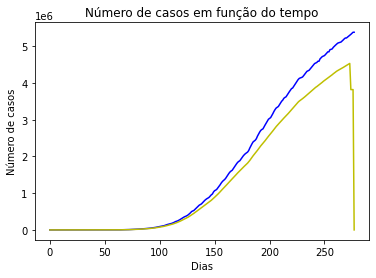

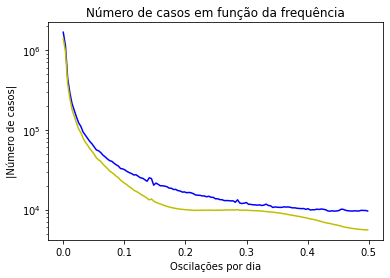

In [9]:
### SEU CÓDIGO COMEÇA AQUI ###
brCasDR=mediaMovelNaoCausal(brCas,7)

brCasDRFFT=fft(brCasDR)/len(brCasDR)
print("_______________________________")
print("|           LEGENDA            |")
print("|Azul-Número de casos          |")
print("|Amarelo-Média móvel ideal     |")
print("|______________________________|")
brCasDRFFT=brCasDRFFT[:len(brCasDRFFT)//2]
plt.title("Número de casos em função do tempo")
plt.ylabel("Número de casos")
plt.xlabel("Dias")
plt.plot(brCas,c='b')
plt.plot(brCasDR,c='y')
plt.show()

plt.title("Número de casos em função da frequência")
plt.ylabel("|Número de casos|")
plt.xlabel("Oscilações por dia")
plt.plot(freqs,np.abs(fftbrCas),c='b')
plt.plot(freqs,np.abs(brCasDRFFT),c='y')
plt.yscale('log')
plt.show()
### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico no domínio do tempo da entrada e saída de cada sistema sistema
1. Gráfico de FFT entrada e saída de cada sistema sistema

_______________________________
|           LEGENDA            |
|Azul-Número de casos          |
|Amarelo-Média móvel ideal     |
|______________________________|


C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


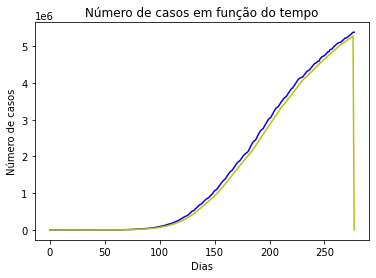

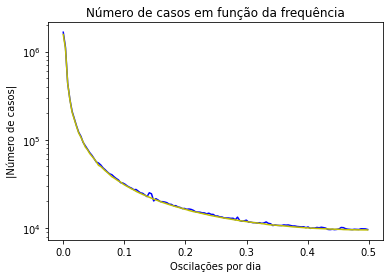

In [10]:
### SEU CÓDIGO COMEÇA AQUI ###
brCasDR=mediaMovelCausal(brCas,7)

brCasDRFFT=fft(brCasDR)/len(brCasDR)
print("_______________________________")
print("|           LEGENDA            |")
print("|Azul-Número de casos          |")
print("|Amarelo-Média móvel ideal     |")
print("|______________________________|")
brCasDRFFT=brCasDRFFT[:len(brCasDRFFT)//2]
plt.title("Número de casos em função do tempo")
plt.ylabel("Número de casos")
plt.xlabel("Dias")
plt.plot(brCas,c='b')
plt.plot(brCasDR,c='y')
plt.show()

plt.title("Número de casos em função da frequência")
plt.ylabel("|Número de casos|")
plt.xlabel("Oscilações por dia")
plt.yscale('log')
plt.plot(freqs,np.abs(fftbrCas),c='b')
plt.plot(freqs,np.abs(brCasDRFFT),c='y')
plt.show()
### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico no domínio do tempo da entrada e saída de cada sistema sistema
1. Gráfico de FFT entrada e saída de cada sistema sistema
___

# Conclusões

Com este trabalho, foi possível perceber na prática os efeitos causados pelos sistemas utilizados, como a suavização das curvas causadas pela média móvel.Além diso, foi possível notar que a média móvel não causal tem um adiantamento em relação à média móvel causal.

______________

# Desafio (opcional)

Use os seus conhecimentos (e também de pesquisas na internet) sobre processamento de sinais discretos para encontrar informações interessantes sobre os dados da covid. Pode usar dados de outros países ou até outra base de dados.

In [11]:
print("Impotando dado dos países")
print("China")

# número de casos confirmados
ChinaCas = dados[dados['Country'] == 'China']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
ChinaMor = dados[dados['Country'] == 'China']['Deaths'].to_numpy(dtype=np.float64)

print("US")
# número de casos confirmados
USCas = dados[dados['Country'] == 'US']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
USMor = dados[dados['Country'] == 'US']['Deaths'].to_numpy(dtype=np.float64)

print("UK")

# número de casos confirmados
UKCas = dados[dados['Country'] == 'United_Kingdom']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
UKMor = dados[dados['Country'] == 'United_Kingdom']['Deaths'].to_numpy(dtype=np.float64)

print("Italy")
# número de casos confirmados
ItalyCas = dados[dados['Country'] == 'Italy']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
ItalyMor = dados[dados['Country'] == 'Italy']['Deaths'].to_numpy(dtype=np.float64)

print("France")
# número de casos confirmados
FranceCas = dados[dados['Country'] == 'France']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
FranceMor = dados[dados['Country'] == 'France']['Deaths'].to_numpy(dtype=np.float64)

print("Germany")
# número de casos confirmados
GermanyCas = dados[dados['Country'] == 'Germany']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
GermanyMor = dados[dados['Country'] == 'Germany']['Deaths'].to_numpy(dtype=np.float64)

print("Spain")
# número de casos confirmados
SpainCas = dados[dados['Country'] == 'Spain']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
SpainMor = dados[dados['Country'] == 'Spain']['Deaths'].to_numpy(dtype=np.float64)

print("Iran")
# número de casos confirmados
IranCas = dados[dados['Country'] == 'Iran']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
IranMor = dados[dados['Country'] == 'Iran']['Deaths'].to_numpy(dtype=np.float64)


Impotando dado dos países
China
US
UK
Italy
France
Germany
Spain
Iran


C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex v

Comparação entre o número de mortes em relação ao número de casos
de cada país


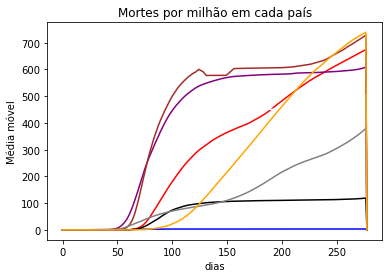

_______________________
|     Legenda          |
|China       - azual   |
|EUA         - Vermelho|
|Reino Unido - Ciano   |
|Italia      - Roxo    |
|França      - Branco  |
|Alemanha    - Preto   |
|Spain       - Marrom  |
|Iran        - Cinza   |
|Brasil      - Laranja |
|______________________|


In [32]:
### SEU CÓDIGO COMEÇA AQUI ###



pChina=1393000000
pUS=328200000
pUK=65650000
pItaly=60360000
pFrance=66990000
pGermany=83020000
pSpain=46940000
pIran=81800000
pbr=209500000
plt.title("Mortes por milhão em cada país")
plt.ylabel("Média móvel")
plt.xlabel("dias")
plt.plot(1000000*mediaMovelCausal(ChinaMor/pChina,7),c='b')
plt.plot(1000000*mediaMovelCausal(USMor/pUS,7),c='r')
plt.plot(1000000*mediaMovelCausal(UKMor/pUK,7),c='cian')
plt.plot(1000000*mediaMovelCausal(ItalyMor/pItaly,7),c='purple')
plt.plot(1000000*mediaMovelCausal(FranceMor/pFrance,7),c='w')
plt.plot(1000000*mediaMovelCausal(GermanyMor/pGermany,7),c='black')
plt.plot(1000000*mediaMovelCausal(SpainMor/pSpain,7),c='brown')
plt.plot(1000000*mediaMovelCausal(IranMor/pIran,7),'gray')
plt.plot(1000000*mediaMovelCausal(brMor/pbr,7),c='orange')
print("Comparação entre o número de mortes em relação ao número de casos")
print("de cada país")
plt.show()
print("_______________________")
print("|     Legenda          |")
print("|China       - azual   |")
print("|EUA         - Vermelho|")
print("|Reino Unido - Ciano   |")
print("|Italia      - Roxo    |")
print("|França      - Branco  |")
print("|Alemanha    - Preto   |")
print("|Spain       - Marrom  |")
print("|Iran        - Cinza   |")
print("|Brasil      - Laranja |")
print("|______________________|")
print("Obs: pode-se observar que o Brasil(curva laranja) ")
print("não teve ")

### FIM DO CÓDIGO ###

Bom trabalho :c)